In [46]:
################### LER A IMAGEM DE TEMPO DE VIAGEM ####################
from osgeo import gdal, ogr, osr
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os.path
import os

########### ABRIR ARQUIVO RASTER ###############################################
######## É PRECISO QUE A PROJEÇÃO ESTEJA EM UTM ###################

#STR
#img = 'D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2010/custo_cumulativo/custo_cumulativo_STR_viasTotal_Minutos_2010.tif'
#img = 'D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2020/custo_cumulativo/custo_cumulativo_STR_viasTotal_Minutos_2020.tif'

#CAMETA
#img = 'D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2010/custo_cumulativo/custo_cumulativo_cameta_viasTotal_Minutos_2010.tif'
img = 'D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2020/custo_cumulativo/custo_cumulativo_cameta_viasTotal_Minutos_2020.tif'

ds = gdal.Open(img)
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

band = ds.GetRasterBand(1)
array = band.ReadAsArray()

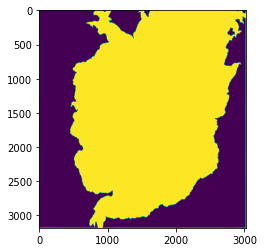

In [47]:
plt.imshow(array < 180)

In [48]:
########## ABRIR ARQUIVO SHP DOS BUFFERS SELECIONADOS #######################################

# STR
#sc_urb = 'D:/INPE_DISCIPLINAS/Dissertacao/shapes/area_influencia/buffer_povoados_STR_2013_1400.shp'
#sc_urb = 'D:/INPE_DISCIPLINAS/Dissertacao/shapes/area_influencia/buffer_povoados_STR_2020_1600.shp'

# CAMETA
#sc_urb = 'D:/INPE_DISCIPLINAS/Dissertacao/shapes/area_influencia/buffer_povoados_CAMETA_2013_1200.shp'
sc_urb = 'D:/INPE_DISCIPLINAS/Dissertacao/shapes/area_influencia/buffer_povoados_CAMETA_2020_1300.shp'

area_urb = gpd.read_file(sc_urb)
area_urb = area_urb[area_urb['tempViag']==1]

area_urb[0:3]

#area_urb[0].plot(marker='o', color='red', markersize=5, edgecolor = 'black')

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,caso,situacaoNu,perim_peri,pera_buen,area_peri,tempViag,ID,geometry
3,150210310000004,5,Povoado,15,b'Par\xe1',PA,1502103,b'Camet\xe1',150210310,b'Carapaj\xf3',15021031000,None,2,5,None,rural,NaN,1,3,"POLYGON ((678235.545 9743355.435, 677903.654 9..."
4,150210310000007,5,Povoado,15,b'Par\xe1',PA,1502103,b'Camet\xe1',150210310,b'Carapaj\xf3',15021031000,None,2,5,None,rural,NaN,1,4,"POLYGON ((681667.272 9752516.977, 681504.503 9..."
5,150210310000010,5,Povoado,15,b'Par\xe1',PA,1502103,b'Camet\xe1',150210310,b'Carapaj\xf3',15021031000,None,2,5,None,rural,1.0,1,5,"POLYGON ((684988.016 9758959.618, 685061.527 9..."


In [49]:
print(area_urb.crs, '\n alterando EPSG \n')
area_urb = area_urb.to_crs("EPSG:4326")
print('epsg alterado para ->',area_urb.crs)

PROJCS["SIRGAS_2000_UTM_Zone_22S",GEOGCS["GCS_SIRGAS_2000",DATUM["D_SIRGAS_2000",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]] 
 alterando EPSG 

epsg alterado para -> EPSG:4326


<AxesSubplot:>

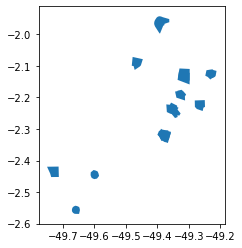

In [50]:
area_urb.plot()

In [51]:
area_urb['ID'] = range(1, len(area_urb['geometry']) + 1)

In [52]:
area_urb['ID'][0:4]

3    1
4    2
5    3
6    4
Name: ID, dtype: int64

In [53]:
########################### MODIFICAR PARA OS DESTINOS ESPECÍFICOS DESEJADOS #################################################
a = 'False'
limiar = 0   # limiar inicial a ser utilizado na imagem
per = 0 # porcentagem
limiarizado = 'D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2020/custo_cumulativo/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.tif'  # local do arquivo limiarizado.tif     #
out_path = 'D:/INPE_DISCIPLINAS/Dissertacao/shapes/tempo_viagem/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.shp' # LOCAL SHP LIMIARIZADO
bloco_notas = 'D:/INPE_DISCIPLINAS/Dissertacao/tabelas/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.txt'  # local armazenado os valores de limiares testados #

epsg = int(4326) # colocar somento o identificador do epsg
EPSG = str("EPSG:4326") # inserir após "EPSG:" o identificador do epsg

In [54]:
arquivos = [limiarizado, out_path, bloco_notas]
for i in arquivos:
    if os.path.exists(i):
        os.remove(i)
        print(f'removido: {i}')
    else:
        print(f'sem arquivos com nomes inseridos')

removido: D:/INPE_DISCIPLINAS/Dissertacao/raster/mapbiomas/2020/custo_cumulativo/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.tif
removido: D:/INPE_DISCIPLINAS/Dissertacao/shapes/tempo_viagem/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.shp
removido: D:/INPE_DISCIPLINAS/Dissertacao/tabelas/cumulativo_CAMETA_viasTotal_Min_2020_Limiar.txt


In [55]:
while per < 0.75: # PORCENTAGEM DE SETORES QUE INTERSECTAM COM O LIMIAR 
    ####################### EXPORTANDO O RASTER LIMIARIZADO ######################
    '''
    NESSA PARTE USA O LIMIARIZADO E O LIMIAR
    '''
    print('teste limiar: ', limiar)
    classificacao = array < limiar

    if os.path.exists(limiarizado):
        os.remove(limiarizado) 
        
    driver = gdal.GetDriverByName('GTiff')
    driver.Register()

    outds = driver.Create(limiarizado, xsize=classificacao.shape[1],
                     ysize = classificacao.shape[0],
                     bands = 1,
                     eType = gdal.GDT_Float32)

    outds.SetGeoTransform(gt)
    outds.SetProjection(proj)
    outband = outds.GetRasterBand(1)
    outband.WriteArray(classificacao)
    outband.SetNoDataValue(np.nan)
    outband.FlushCache()

    outband = None
    outds = None
     
    ######################## CONVERTER RASTER LIMIARIZADO PARA VETOR ####################
    '''
    NESSA PARTE USA O LIMIARIZADO (TIF) E O OUT_PATH (SHP)
    '''
    if os.path.exists(out_path):
            os.remove(out_path)

    #  get raster datasource
    src_ds = gdal.Open( limiarizado )
    #
    srcband = src_ds.GetRasterBand(1)
    dst_layername = 'teste_str2013'
    drv = ogr.GetDriverByName("ESRI Shapefile")
    dst_ds = drv.CreateDataSource( out_path )

    sp_ref = osr.SpatialReference()
    sp_ref.SetFromUserInput(EPSG)

    dst_layer = dst_ds.CreateLayer(dst_layername, srs = sp_ref )

    fld = ogr.FieldDefn("Value", ogr.OFTInteger)
    dst_layer.CreateField(fld)
    dst_field = dst_layer.GetLayerDefn().GetFieldIndex("Value")

    gdal.Polygonize( srcband, None, dst_layer, dst_field, [], callback=None )

    del src_ds
    del dst_ds
    
    ###############  COMPARAR OS SHAPES DE LUZ NOTURNA COM AREA URBANA #########################
    '''
    NESSA PARTE USA O OUT_PATH (SHP) E A ÁREA URBANA JÁ DEFINIDA ANTERIORMENTE EM sc_urb E area_urb
    '''
    
    luz_not = gpd.read_file(out_path)

    # https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html
    reproj = luz_not.set_crs(epsg=epsg)
    reproj = reproj[reproj['Value'] == 1].dissolve()
    
    s = 0 # soma dos setores para porcentagem futura
    t = 0 # setores com intersecção
    for i in area_urb['ID']:
        a = area_urb[area_urb['ID'] == i].dissolve()
        
        if 'False' not in str(a.intersects(reproj)):
            #print(i, 'intersects')
            t = t + 1
        
        s = s+1
    
    per = t/s    

    with open (bloco_notas, 'a') as arquivo:
        arquivo.write(str(limiar))
    
    limiar = limiar + 5

limiar = limiar - 5
print('LIMIAR ENCONTRADO: ', str(limiar))
with open (bloco_notas, 'a') as arquivo:
    arquivo.write(f'LIMIAR ENCONTRADO: {str(limiar)}')

teste limiar:  0
teste limiar:  5
teste limiar:  10
teste limiar:  15
teste limiar:  20
teste limiar:  25
teste limiar:  30
teste limiar:  35
teste limiar:  40
teste limiar:  45
LIMIAR ENCONTRADO:  45


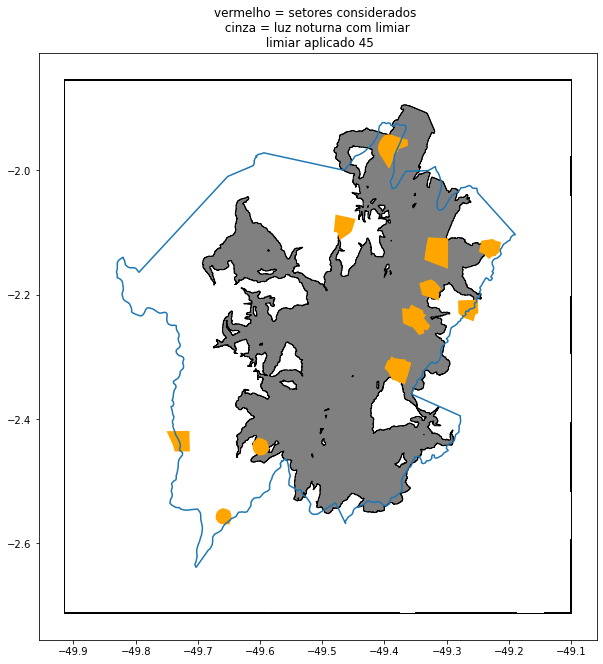

In [56]:
################### COMPARAR VETORES - SOBREPOSICAO #################
temp_viagem = gpd.read_file(out_path)

munic = gpd.read_file('D:/ibge/municipios/2010/15MUE250GC_SIR.shp')
m = munic[munic['NM_MUNICIP'] == 'CAMETÁ']

# https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_crs.html
reproj = temp_viagem.set_crs(epsg=epsg)
reproj = reproj[reproj['Value'] == 1]#.dissolve()

base = reproj.plot(color='grey', edgecolor='black', figsize=(10, 20))
base.set_title(f'vermelho = setores considerados \n cinza = luz noturna com limiar \n limiar aplicado {limiar}')
area_urb.plot(ax=base, marker='o', color='orange', markersize=5, figsize=(15, 30))
m.boundary.plot(ax=base);